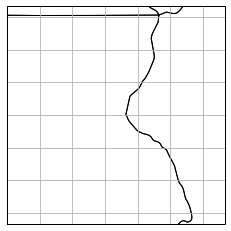

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np


# proj = ccrs.LambertConformal(central_latitude = 25, 
#                              central_longitude = 265, 
#                              standard_parallels = (25, 25))

# proj = ccrs.PlateCarree()
proj = ccrs.PlateCarree()

# Data and coordinates (from download link above)
# with np.load('nam_218_20120414_1200_006.npz') as nam:
#    dat = nam['dpc']
#    lat = nam['lat']
#    lon = nam['lon']

ax = plt.axes(projection = proj)
# ax.pcolormesh(lon, lat, dat, transform = ccrs.PlateCarree())
# ax.add_feature(cf.NaturalEarthFeature(
#                category='cultural',
#                name='admin_1_states_provinces_lines',
#                scale='10m',
#                facecolor='none'))


ax.coastlines('10m')
# ax.add_feature(cf.BORDERS)
ax.add_feature(cf.STATES.with_scale('10m'))

# The extent bounds are specified as an array [[x0, y0], [x1, y1]], 
# where x0 is the left side of the extent, y0 is the top, x1 is the right and y1 is the bottom.
# extent (x0, x1, y0, y1)
# extent = [-180,180, -90,90] # world
# extent = [-90, -30, 20, -60] # south america
# extent = [-74, -31, 5.5, -33] # brazil
# extent = [-53.5, -45, -11, -20] # brazil
extent = [-48, -47, -16, -17] # brazil
# extent = [-90, -30, 20, -60]
# extent = [-100, 30, 0, 80]
# extent = [-87.35, -79.5, 24.1, 30.8]


ax.set_extent(extent, crs=ccrs.PlateCarree())

ax.gridlines()

plt.show()

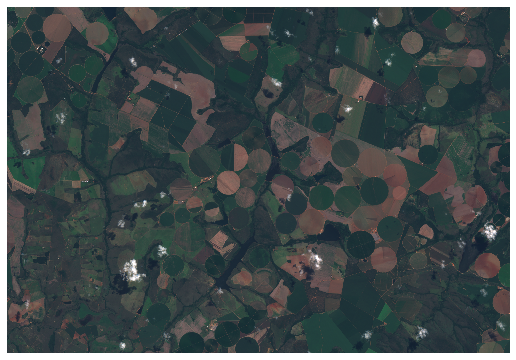

In [6]:
# First: read the geotiff image with GDAL.
from osgeo import gdal, osr

gdal.UseExceptions()


fname = '/notebooks/resources/T22KHG_20190425T132241_TCI_smaller.tif'

ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

# Second: convert the WKT projection information to a cartopy projection.
# import cartopy.crs as ccrs



projcs = inproj.GetAuthorityCode('PROJCS')
projection = ccrs.epsg(projcs)

# Third (and last): the figure.
# import matplotlib.pyplot as plt
# %matplotlib inline

subplot_kw = dict(projection=projection)
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

img = ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent, origin='upper')

In [ ]:
# plt.figure(figsize=(5.12985642927, 3)) 
# ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-35)) 
# ax.set_extent([-100, 30, 0, 80]) 
# ax.set_ylim([0, 80]) 
# ax.coastlines(resolution='110m') 
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--') 

In [ ]:
# import os

# import matplotlib.pyplot as plt
# from cartopy import config
# import cartopy.crs as ccrs
# from matplotlib.image import imread

# ax = plt.axes(projection=ccrs.Robinson())

# ax.set_global()
# # get the path to an image (in this case, a stock image which ships with cartopy)
# fname = os.path.join(config["repo_data_dir"],
#                      'raster', 'natural_earth', '50-natural-earth-1-downsampled.png')
# img = imread(fname)
# ax.imshow(img, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

# ax.coastlines()

# plt.show()